<a href="https://colab.research.google.com/github/Amy-codes-stuff/Data-Analysis/blob/main/preprossesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('googleplaystore.csv').dropna()
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.3+ MB


In [5]:
df.describe()

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [6]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [7]:
mean_rating = float(str(df['Rating'].mean())[:4])
mean_rating

4.19

In [8]:
count = (df['Rating'] == 5.0).sum()
print(count)

274


In [9]:
count4 = (df['Rating']>=4).sum()
print(count4)

7363


In [10]:
df['Category']. unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [11]:
df['Category'].value_counts()

,count
Category,
FAMILY,1746
GAME,1097
TOOLS,733
PRODUCTIVITY,351
MEDICAL,350
COMMUNICATION,328
FINANCE,323
SPORTS,319
PHOTOGRAPHY,317


In [12]:
df['Content Rating'].value_counts()

,count
Content Rating,
Everyone,7414
Teen,1084
Mature 17+,461
Everyone 10+,397
Adults only 18+,3
Unrated,1


In [14]:
data = pd.read_csv('Data.csv')
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,Yes
1,Spain,27.0,48000.0,Yes
2,NaN,30.0,54000.0,NaN
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [15]:
# Calculate the mean of the 'Age' and 'Salary' columns

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(data.iloc[:, :])
data.iloc[:, :] = imputer.transform(data.iloc[:, :])
data


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,Yes
1,Spain,27.0,48000.0,Yes
2,France,30.0,54000.0,Yes
3,Spain,38.0,61000.0,No
4,Germany,40.0,48000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,27.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [16]:
df2 = pd.read_csv('googleplaystore.csv')
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [17]:
df2.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [18]:
impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
impute.fit(df2.iloc[:, 2:3])
df2.iloc[:, 2:3] = impute.transform(df2.iloc[:, 2:3])


In [19]:
df2.dropna().isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


# OUTLIERS (Z-SCORE)

In [ ]:
data = pd.read_csv('scholarship.csv')
data


,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


/tmp/ipython-input-10-1694898908.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['semester_percentage'])
/tmp/ipython-input-10-1694898908.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['scholarship_exam_marks'])


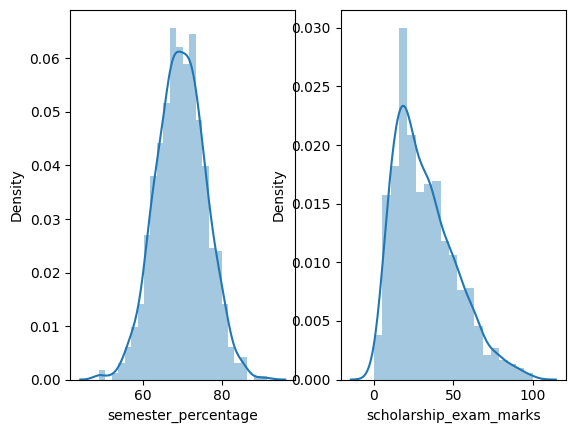

In [ ]:
plt.subplot(1,2,1)
sns.distplot(data['semester_percentage'])
plt.subplot(1,2,2)
sns.distplot(data['scholarship_exam_marks'])
plt.show()

In [ ]:
#semester percentage shows normal distribution
#thus we'll use z-score method for outlier ditection and removal

data['semester_percentage'].describe()

,semester_percentage
count,1000.000000
mean,69.612400
std,6.158979
min,48.900000
25%,65.500000
50%,69.600000
75%,73.700000
max,91.200000


In [ ]:
mean = data['semester_percentage'].mean()
std = data['semester_percentage'].std()
min = data['semester_percentage'].min()
max = data['semester_percentage'].max()
print(mean, std, min, max)

69.6124 6.158978751323897 48.9 91.2


In [ ]:
#finding boundries
#high = mean+3*std
#low = mean - 3*std

highest = round(mean + (3 * std), 1)
lowest = round(mean - (3 * std), 1)

print(highest, lowest)


88.1 51.1


In [ ]:
#finding outliers
#less than lowest and greater than highest

data[(data['semester_percentage']>highest) | (data['semester_percentage']<lowest)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


#2 methods of removing outliers
#1. trimming - removing the outliers by leaving them of the data
#2. capping - removing the outliers by converting them to the highest or lowest values

In [ ]:
#1. trimming
df1 = data.copy()
df1 = df1[(df1['semester_percentage']<highest) & (data['semester_percentage']>lowest)]
df1.shape

(995, 3)

In [ ]:
#2. capping
df2 = data.copy()
df2['semester_percentage'] = np.where(df2['semester_percentage']>highest, highest, np.where(df2['semester_percentage']<lowest, lowest, df2['semester_percentage']))
df2

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.1,44,1
996,88.1,65,1
997,51.1,34,0
998,86.2,46,1


using z-score

In [ ]:
#z-score = data-data(mean)/std

data['z_score'] = (data['semester_percentage']-mean)/std
data

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
998,86.2,46,1,2.693239


In [ ]:
data[(data['z_score']>3) | (data['z_score']<-3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [ ]:
#capping
data['semester_percentage'] = np.where(data['z_score']>3, highest, np.where(data['z_score']<-3, lowest, data['semester_percentage']))
data

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
995,88.1,44,1,3.099150
996,88.1,65,1,3.505062
997,51.1,34,0,-3.362960
998,86.2,46,1,2.693239
